### Advanced Machine Learning

# Home Exercise #4

Assignment Due: 17/05/21 23:59

Jonathan Schler

In [1]:
student1Name="" # student1 name here
student1ID="" # student1 ID here


student2Name="" # student2 name here
student2ID="" # student2 ID here


The goal of this homework is to try to solve the problem of predicting wine quality from review texts and other properties of the wine. You can find the dataset here:https://www.kaggle.com/zynicide/wine-reviews

While you can find several kernels on kaggle already, I highly recommend you start your ownsolution from scratch. For this homework, only use wine from the United States (only 42% of data). Feel free to subsample the data for building your model.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
df_first=pd.read_csv("winemag-data_first150k.csv", index_col="Unnamed: 0")
df_first.head().T

0  \
country                                                     US   
description  This tremendous 100% varietal wine hails from ...   
designation                                  Martha's Vineyard   
points                                                      96   
price                                                    235.0   
province                                            California   
region_1                                           Napa Valley   
region_2                                                  Napa   
variety                                     Cabernet Sauvignon   
winery                                                   Heitz   

                                                             1  \
country                                                  Spain   
description  Ripe aromas of fig, blackberry and cassis are ...   
designation               Carodorum Selección Especial Reserva   
points                                                      96   
price                                                    110.0   
province                                        Northern Spain   
region_1                                                  Toro   
region_2                                                   NaN   
variety                                          Tinta de Toro   
winery                                 Bodega Carmen Rodríguez   

                                                             2  \
country                                                     US   
description  Mac Watson honors the memory of a wine once ma...   
designation                      Special Selected Late Harvest   
points                                                      96   
price                                                     90.0   
province                                            California   
region_1                                        Knights Valley   
region_2                                                Sonoma   
variety                                        Sauvignon Blanc   
winery                                                Macauley   

                                                             3  \
country                                                     US   
description  This spent 20 months in 30% new French oak, an...   
designation                                            Reserve   
points                                                      96   
price                                                     65.0   
province                                                Oregon   
region_1                                     Willamette Valley   
region_2                                     Willamette Valley   
variety                                             Pinot Noir   
winery                                                   Ponzi   

                                                             4  
country                                                 France  
description  This is the top wine from La Bégude, named aft...  
designation                                         La Brûlade  
points                                                      95  
price                                                     66.0  
province                                              Provence  
region_1                                                Bandol  
region_2                                                   NaN  
variety                                     Provence red blend  
winery                                    Domaine de la Bégude

In [4]:
df=df_first[df_first['country']=='US']
df.head().T

0  \
country                                                     US   
description  This tremendous 100% varietal wine hails from ...   
designation                                  Martha's Vineyard   
points                                                      96   
price                                                    235.0   
province                                            California   
region_1                                           Napa Valley   
region_2                                                  Napa   
variety                                     Cabernet Sauvignon   
winery                                                   Heitz   

                                                             2  \
country                                                     US   
description  Mac Watson honors the memory of a wine once ma...   
designation                      Special Selected Late Harvest   
points                                                      96   
price                                                     90.0   
province                                            California   
region_1                                        Knights Valley   
region_2                                                Sonoma   
variety                                        Sauvignon Blanc   
winery                                                Macauley   

                                                             3  \
country                                                     US   
description  This spent 20 months in 30% new French oak, an...   
designation                                            Reserve   
points                                                      96   
price                                                     65.0   
province                                                Oregon   
region_1                                     Willamette Valley   
region_2                                     Willamette Valley   
variety                                             Pinot Noir   
winery                                                   Ponzi   

                                                             8  \
country                                                     US   
description  This re-named vineyard was formerly bottled as...   
designation                                             Silice   
points                                                      95   
price                                                     65.0   
province                                                Oregon   
region_1                                    Chehalem Mountains   
region_2                                     Willamette Valley   
variety                                             Pinot Noir   
winery                                               Bergström   

                                                             9  
country                                                     US  
description  The producer sources from two blocks of the vi...  
designation                               Gap's Crown Vineyard  
points                                                      95  
price                                                     60.0  
province                                            California  
region_1                                          Sonoma Coast  
region_2                                                Sonoma  
variety                                             Pinot Noir  
winery                                               Blue Farm

In [5]:
df = df.dropna()

## Task 1 Bag of Words and simple Features [50pts]

1.1 Create a baseline model for predicting wine quality using only non-text features.





In [6]:
df_numeric = df.select_dtypes(exclude=['object'])
df_numeric.isna().sum()

points    0
price     0
dtype: int64

In [7]:
df_numeric = df_numeric.dropna()
df_numeric.info

<bound method DataFrame.info of         points  price
0           96  235.0
2           96   90.0
3           96   65.0
8           95   65.0
9           95   60.0
...        ...    ...
150889      82   35.0
150892      82   10.0
150914      94   25.0
150915      93   30.0
150916      93   65.0

[39241 rows x 2 columns]>

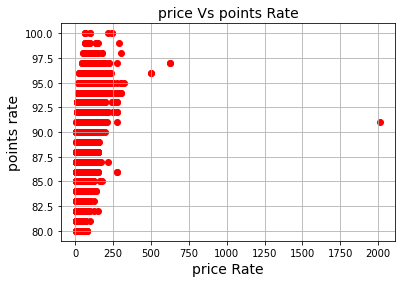

In [8]:
plt.scatter(df_numeric['price'], df_numeric['points'], color='red')
plt.title('price Vs points Rate', fontsize=14)
plt.xlabel('price Rate', fontsize=14)
plt.ylabel('points rate', fontsize=14)
plt.grid(True)
plt.show()


In [9]:
df_numeric.shape

(39241, 2)

In [10]:
from sklearn.model_selection import train_test_split

x= df_numeric.iloc[:,1].values.reshape(-1, 1)
y=df_numeric.iloc[:,0].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [12]:
model = LinearRegression().fit(x_train,y_train)


y_pred=model.predict(x_test).astype('int64')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))


[[  0   0   0   0   0   0  21  36  13   1   1   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  21  45  15   5   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 118 179  67  11   4   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 155 205  68  15   3   2   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 210 361 154  41  16   1   1   0   1   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 226 364 160  37  12   1   0   0   0   0   1   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 191 437 245  81  22   6   5   2   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 228 690 385 142  36   6   4   0   8   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 132 574 343 144  26  15   5   3   9   3   0   0
    0   0   0   0   0 

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=os.cpu_count()).fit(x_train,y_train)

y_pred=model.predict(x_test).astype('int64')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

C:\Users\eugene_s\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[[   0    0    0    0    0    0    0   68    0    0    3    0    2    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0   73    0    0   11    0    1    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    2    0    0  339    0    0   32    0    6    1
     0    0    0    0    0    0    0]
 [   0    0    0    0    2    0    0  404    0    0   35    0    7    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    7    0    0  647    0    0  102    0   26    3
     0    0    0    0    0    0    0]
 [   0    0    0    0    3    0    0  685    0    0   94    0   18    0
     1    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  767    0    0  168    

1.2 Create a simple text-based model using a bag-of-words approach and a linear model.


In [14]:
#Vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english',token_pattern=r"[a-zA-Z]+", min_df=2,)
description = vect.fit_transform(df['description'])

#Vocabulary
feature_names = vect.get_feature_names()
print(feature_names[:40])
print(feature_names[::2000])





['abacela', 'abandoned', 'abandoning', 'abbey', 'abbott', 'abbreviated', 'abeja', 'abetina', 'ability', 'able', 'abondante', 'abound', 'abounds', 'abracadabra', 'abrasive', 'abreu', 'abrupt', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absorb', 'absorbed', 'abundance', 'abundant', 'abundantly', 'abv', 'acacia', 'acccessible', 'accent', 'accented', 'accenting', 'accents', 'accentuate', 'accentuated', 'accentuates', 'accentuating', 'acceptable', 'acceptance']
['abacela', 'coladas', 'floweriness', 'macaroon', 'qualities', 'suppose']


In [15]:
x_train, x_test, y_train, y_test = train_test_split(description, df['points'], test_size=0.30, random_state=42, stratify=df['points'])


In [16]:
print(x_train.shape)
print(x_test.shape)

(27468, 11581)
(11773, 11581)


In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(n_jobs=os.cpu_count()).fit(x_train, y_train)
lr.score(x_test, y_test)


0.48390384778730994

1.3 Try using n-grams, characters, tf-idf rescaling and possibly other ways to tune the BoW model. Be aware that you might need to adjust the (regularization of the) linear model for different feature sets.


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1, 3), stop_words='english',token_pattern=r"[a-zA-Z]+")
description = vect.fit_transform(df['description'])

#Vocabulary
feature_names = vect.get_feature_names()
print(feature_names[:40])
print(feature_names[::2000])

x_train, x_test, y_train, y_test = train_test_split(description, df['points'], test_size=0.30, random_state=42, stratify=df['points'])


['aaron', 'aaron pott', 'abacela', 'abacela crafted', 'abacela great', 'abacela s', 'abacela showcases', 'abacela vineyards', 'abandon', 'abandon midpalate', 'abandoned', 'abandoned sangiovese', 'abandoned trace', 'abandoning', 'abandoning efforts', 'abbey', 'abbey ridge', 'abbey serve', 'abbinare', 'abbinare miscela', 'abbott', 'abbott claim', 'abbreviated', 'abbreviated finish', 'abbreviated growing', 'abeja', 'abeja black', 'abeja s', 'abernathy', 'abernathy vineyard', 'aberrant', 'aberrant cellars', 'abetina', 'abetina just', 'abetina madrona', 'abetina subtle', 'abeyance', 'abeyance wine', 'abilities', 'abilities red']
['aaron', 'acidity elements', 'adds fine', 'alcohol fueled', 'anjou peas', 'apt descriptor', 'assuredly', 'baked apples', 'barrel note', 'benchmark american', 'biodynamic wine', 'blanc makes', 'blueberries sprinkled', 'bottle hands', 'briary herbs', 'brusque', 'cab produced', 'canned peaches', 'cedar drink', 'character syrah', 'cherries figs', 'chocolate wash', 'cle

In [ ]:
lr = LogisticRegression(n_jobs=os.cpu_count()).fit(x_train, y_train)
lr.score(x_test, y_test)

1.4 Combine the non-text features and the text features. How does adding those features improve upon just using bag-of-words?

In [19]:
#your code here

## Task 2 Word Vectors [50pts]

Use a pretrained word-embedding (word2vec, glove or fasttext) for featurization instead of the bag-of-words model. Does this improve classification? How about combining the embedded words with the BoW model?

In [20]:
#your code here

# Task 3 Transformers (bonus / optional) [50pts] - Like Extra Assignment with 50% weight

Fine-tune a BERT model on the text data alone using the transformers library. How does this model compare to a BoW model, and how does it compare to a model using all features?

In [21]:
#your code here